In [22]:
from cw_eval.evalfunctions import calculate_iou

In [2]:
import geopandas as gpd

In [3]:
import shapely

In [8]:
gt_gdf_1 = gpd.read_file('/Users/nweir/code/cosmiq_repos/SpaceNet4_Baseline/val_geojson/spacenet-buildings_736301_3722439.geojson')
pred_gdf_1 = gpd.read_file('/Users/nweir/code/cosmiq_repos/SpaceNet4_Baseline/Pan-Sharpen_Atlanta_nadir7_catid_1030010003D22F00_736301_3722439.json')

In [13]:
pred_poly = pred_gdf_1.iloc[0, 2]

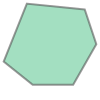

In [14]:
pred_poly

In [19]:
iou_gdf = evalfunctions.calculate_iou(pred_poly, gt_gdf_1)

In [20]:
print(iou_gdf)

   access addr_house addr_hou_1 addr_inter admin_leve aerialway aeroway  \
27                                                                        

   amenity area barrier    ...    wood z_order tracktype  way_area  \
27                         ...         -999999           -999999.0   

      origarea origlen partialDec truncated  \
27  152.874256       0        1.0         0   

                                             geometry iou_score  
27  POLYGON ((736351.470539042 3722758.485215372, ...    0.0735  

[1 rows x 75 columns]


In [32]:
from shapely.geometry import mapping
mapping(pred_poly)

{'type': 'Polygon',
 'coordinates': (((736348.0, 3722762.5),
   (736353.0, 3722762.0),
   (736354.0, 3722759.0),
   (736352.0, 3722755.5),
   (736348.5, 3722755.5),
   (736346.0, 3722757.5),
   (736348.0, 3722762.5)),)}

In [24]:
import os

In [33]:
apoly = shapely.geometry.Polygon(((736348.0, 3722762.5),
   (736353.0, 3722762.0),
   (736354.0, 3722759.0),
   (736352.0, 3722755.5),
   (736348.5, 3722755.5),
   (736346.0, 3722757.5),
   (736348.0, 3722762.5)))

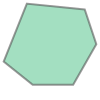

In [34]:
apoly

In [35]:
iou_gdf = evalfunctions.calculate_iou(apoly, gt_gdf_1)

In [36]:
iou_gdf

,access,addr_house,addr_hou_1,addr_inter,admin_leve,aerialway,aeroway,amenity,area,barrier,...,wood,z_order,tracktype,way_area,origarea,origlen,partialDec,truncated,geometry,iou_score
27,,,,,,,,,,,...,,-999999,,-999999.0,152.874256,0,1.0,0,"POLYGON ((736351.470539042 3722758.485215372, ...",0.0735


In [39]:
iou_gdf.to_file('/Users/nweir/code/cosmiq_repos/cw-eval/cw_eval/data/overlap_test.geojson', driver='GeoJSON')

In [40]:
pred_gdf = gpd.read_file('/Users/nweir/code/cosmiq_repos/cw-eval/cw_eval/data/overlap_test.geojson')

In [41]:
iou_gdf == pred_gdf

ValueError: Can only compare identically-labeled DataFrame objects

In [42]:
iou_gdf

,access,addr_house,addr_hou_1,addr_inter,admin_leve,aerialway,aeroway,amenity,area,barrier,...,wood,z_order,tracktype,way_area,origarea,origlen,partialDec,truncated,geometry,iou_score
27,,,,,,,,,,,...,,-999999,,-999999.0,152.874256,0,1.0,0,"POLYGON ((736351.470539042 3722758.485215372, ...",0.0735


In [43]:
pred_gdf

,access,addr_house,addr_hou_1,addr_inter,admin_leve,aerialway,aeroway,amenity,area,barrier,...,wood,z_order,tracktype,way_area,origarea,origlen,partialDec,truncated,iou_score,geometry
0,,,,,,,,,,,...,,-999999,,-999999.0,152.874256,0,1.0,0,0.0735,"POLYGON ((736351.470539042 3722758.485215372, ..."


In [45]:
assert iou_gdf.index[0] == 27

In [49]:
iou_gdf.reset_index(drop=True) == pred_gdf

ValueError: Can only compare identically-labeled DataFrame objects

In [54]:
assert iou_gdf.iou_score.iloc[0] == pred_gdf.iou_score.iloc[0]

In [56]:
iou_gdf.iou_score[27]

0.073499798744833519

In [58]:
assert iou_gdf.iou_score.iloc[0] == 0.073499798744833519

AssertionError: 

In [60]:
emptypoly = shapely.geometry.Polygon()

In [61]:
noiou = evalfunctions.calculate_iou(emptypoly, gt_gdf_1)

In [62]:
noiou

""


In [63]:
type(noiou)

geopandas.geodataframe.GeoDataFrame

In [64]:
noiou.shape

(0, 0)

In [65]:
pred_poly = pred_gdf_1.iloc[3, 2]

In [66]:
iou_gdf = evalfunctions.calculate_iou(pred_poly, gt_gdf_1)

In [77]:
pred_poly = pred_gdf_1.iloc[11, 2]
iou_gdf = evalfunctions.calculate_iou(pred_poly, gt_gdf_1)
iou_gdf

,access,addr_house,addr_hou_1,addr_inter,admin_leve,aerialway,aeroway,amenity,area,barrier,...,wood,z_order,tracktype,way_area,origarea,origlen,partialDec,truncated,geometry,iou_score
15,,,,,,,,,,,...,,-999999,,-999999.0,494.458190,0,1.0,0,"POLYGON ((736372.6805365498 3722519.044206998,...",0.277727
21,,,,,,,,,,,...,,-999999,,-999999.0,360.546456,0,1.0,0,"POLYGON ((736407.6841525573 3722533.446308028,...",0.313965


In [78]:
mapping(pred_poly)

{'type': 'Polygon',
 'coordinates': (((736414.0, 3722573.0),
   (736417.5, 3722572.5),
   (736420.0, 3722568.0),
   (736421.0, 3722556.0),
   (736418.5, 3722538.0),
   (736424.0, 3722532.5),
   (736424.0, 3722527.0),
   (736422.5, 3722525.5),
   (736412.0, 3722524.0),
   (736410.5, 3722521.5),
   (736407.0, 3722520.5),
   (736383.5, 3722521.0),
   (736376.5, 3722528.5),
   (736378.0, 3722532.5),
   (736402.0, 3722532.0),
   (736410.0, 3722539.0),
   (736411.0, 3722544.0),
   (736408.5, 3722553.5),
   (736409.0, 3722569.0),
   (736414.0, 3722573.0)),)}

# Testing baseeval.py

In [1]:
from cw_eval.baseeval import EvalBase
from cw_eval.data import gt_gdf

In [2]:
gt = gt_gdf()
base_instance = EvalBase(gt)

AttributeError: 'GeoDataFrame' object has no attribute 'startswith'

In [6]:
import cw_eval
import os

In [4]:
cw_eval.data.data_dir

'/anaconda3/envs/spacenetutilities/lib/python3.6/site-packages/cw_eval/data'

In [10]:
aneval = cw_eval.baseeval.EvalBase(os.path.join(cw_eval.data.data_dir, 'gt.geojson'))
gt_gdf = cw_eval.data.gt_gdf()

In [8]:
aneval.ground_truth_sindex

In [11]:
gt_gdf.sindex

In [12]:
aneval.ground_truth_sindex == gt_gdf.sindex

False

In [13]:
gt_gdf.sindex.__dict__

{'properties': {'buffering_capacity': 10, 'custom_storage_callbacks': None, 'custom_storage_callbacks_size': 0, 'dat_extension': 'dat', 'dimension': 2, 'filename': '', 'fill_factor': 0.7, 'idx_extension': 'idx', 'index_capacity': 100, 'index_id': None, 'leaf_capacity': 100, 'near_minimum_overlap_factor': 32, 'overwrite': True, 'pagesize': 4096, 'point_pool_capacity': 500, 'region_pool_capacity': 1000, 'reinsert_factor': 0.3, 'split_distribution_factor': 0.4, 'storage': 0, 'tight_mbr': True, 'tpr_horizon': 20.0, 'type': 0, 'variant': 2, 'writethrough': False},
 'interleaved': True,
 'handle': <rtree.index.IndexStreamHandle at 0x11c7678d0>}

In [18]:
list(gt_gdf.sindex.intersection(aneval.ground_truth_sindex.bounds))

[8,
 14,
 23,
 17,
 26,
 27,
 4,
 19,
 11,
 25,
 15,
 2,
 21,
 12,
 5,
 24,
 18,
 6,
 13,
 3,
 20,
 9,
 7,
 22,
 16,
 10,
 0,
 1]

In [19]:
aneval.ground_truth_sindex.bounds

[736301.0, 3722439.0, 736751.0, 3722758.485215372]

In [20]:
gt_gdf.sindex.bounds

[736301.0, 3722439.0, 736751.0, 3722758.485215372]

In [23]:
import geopandas as gpd
aneval.proposal_GDF == gpd.GeoDataFrame([])

""


In [25]:
assert aneval.proposal_GDF.equals(gpd.GeoDataFrame([]))

In [26]:
assert aneval.ground_truth_GDF.equals(aneval.ground_truth_GDF_Edit)

In [27]:
aneval.load_proposal(os.path.join(cw_eval.data.data_dir, 'pred.geojson'))

0

In [28]:
prop_gdf = cw_eval.data.pred_gdf()

In [40]:
assert aneval.proposal_GDF.iloc[:, 0:3].sort_index().equals(prop_gdf)

In [38]:
list(prop_gdf.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27]

In [39]:
list(aneval.proposal_GDF.index)

[0,
 1,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 27]

In [43]:
score = aneval.eval_iou(calculate_class_scores=False)

28it [00:00, 98.08it/s]


In [44]:
type(score)

list

In [47]:
assert aneval.eval_iou(calculate_class_scores=False)==score

28it [00:00, 96.49it/s]


# Create test function for challenge_eval.off_nadir_dataset

In [1]:
import cw_eval
from cw_eval import data
data.data_dir

'/anaconda3/envs/spacenetutilities/lib/python3.6/site-packages/cw_eval/data'

In [2]:
import os
proposal_csv = os.path.join(data.data_dir, 'sample_preds_competition.csv')
truth_csv = os.path.join(data.data_dir, 'sample_truth_competition.csv')
test_out = 'test'
import subprocess
subprocess.call(['spacenet_eval', '--proposal_csv', proposal_csv,
                         '--truth_csv', truth_csv, '--output_file', test_out])

0

In [8]:
import pandas as pd

In [9]:
test_results = pd.read_csv('test.csv')
full_test_results = pd.read_csv('test_full.csv')

In [10]:
full_test_results

,F1Score,FalseNeg,FalsePos,Precision,Recall,TruePos,imageID,iou_field,nadir-category
0,1.0,0,0,1.0,1.0,59,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
1,1.0,0,0,1.0,1.0,8,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
2,1.0,0,0,1.0,1.0,59,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
3,1.0,0,0,1.0,1.0,18,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
4,1.0,0,0,1.0,1.0,21,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
5,1.0,0,0,1.0,1.0,96,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
6,1.0,0,0,1.0,1.0,43,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
7,1.0,0,0,1.0,1.0,55,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
8,1.0,0,0,1.0,1.0,72,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
9,1.0,0,0,1.0,1.0,122,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir


In [11]:
pred_results = pd.read_csv(os.path.join(data.data_dir, 'competition_test_results.csv'))
pred_results_full = pd.read_csv(os.path.join(data.data_dir, 'competition_test_results_full.csv'))

In [12]:
assert pred_results.equals(test_results)

In [20]:
assert pred_results_full.sort_values(by='imageID').reset_index(drop=True).equals(full_test_results.sort_values(by='imageID').reset_index(drop=True))

In [19]:
pred_results_full.sort_values(by='imageID').reset_index()

,index,F1Score,FalseNeg,FalsePos,Precision,Recall,TruePos,imageID,iou_field,nadir-category
0,25,1.0,0,0,1.0,1.0,96,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
1,27,1.0,0,0,1.0,1.0,59,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
2,6,1.0,0,0,1.0,1.0,91,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
3,22,1.0,0,0,1.0,1.0,71,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
4,7,1.0,0,0,1.0,1.0,121,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
5,26,1.0,0,0,1.0,1.0,60,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
6,2,1.0,0,0,1.0,1.0,72,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
7,14,1.0,0,0,1.0,1.0,55,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
8,13,1.0,0,0,1.0,1.0,28,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
9,24,1.0,0,0,1.0,1.0,3,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir


In [17]:
full_test_results.sort_values(by='imageID')

,F1Score,FalseNeg,FalsePos,Precision,Recall,TruePos,imageID,iou_field,nadir-category
11,1.0,0,0,1.0,1.0,96,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
0,1.0,0,0,1.0,1.0,59,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
30,1.0,0,0,1.0,1.0,91,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
26,1.0,0,0,1.0,1.0,71,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
28,1.0,0,0,1.0,1.0,121,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
15,1.0,0,0,1.0,1.0,60,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
8,1.0,0,0,1.0,1.0,72,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
7,1.0,0,0,1.0,1.0,55,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
17,1.0,0,0,1.0,1.0,28,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
31,1.0,0,0,1.0,1.0,3,Atlanta_nadir8_catid_10300100023BC100_743501_3...,iou_score,Nadir
